In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")
data.head()

,height,weight
0,147,49
1,150,50
2,153,51
3,158,54
4,163,58


In [3]:
data.columns

Index(['height', 'weight'], dtype='object')

In [4]:
x = data["height"]
y = data["weight"]

In [5]:
x

0     147
1     150
2     153
3     158
4     163
5     165
6     168
7     170
8     173
9     175
10    178
11    180
12    183
Name: height, dtype: int64

Text(0, 0.5, 'Weight')

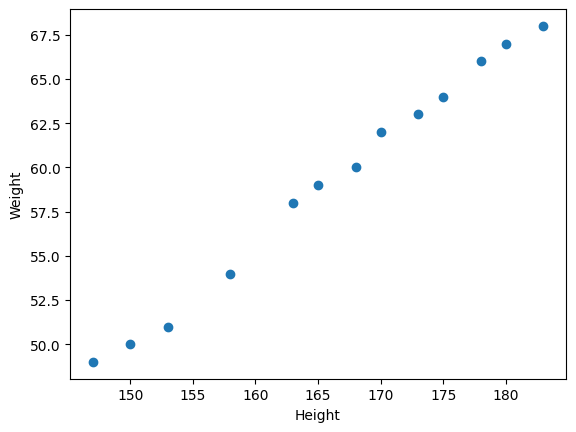

In [6]:
# Vẽ biểu đồ
plt.scatter(x, y)
plt.xlabel("Height")
plt.ylabel("Weight")

Công thức:
weight = w1 \* height + w0


In [7]:
one = np.ones((data.shape[0], 1))

In [8]:
one

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [9]:
Xbar = np.concatenate((one, np.array(x).reshape(-1, 1)), axis=1)

In [10]:
Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

In [11]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

In [12]:
w

array([-33.73541021,   0.55920496])

In [13]:
w_0 = w[0]
w_1 = w[1]

In [14]:
x0 = np.linspace(145, 185, 2)
y0 = w_0 + w_1 * x0

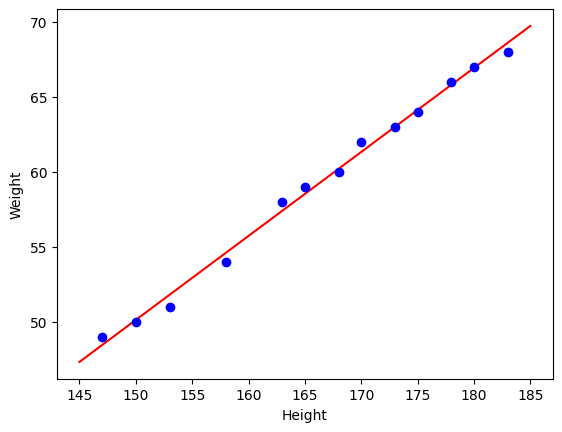

In [15]:
plt.plot(x0, y0, "r")
plt.plot(x, y, "bo")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

In [16]:
w_0, w_1

(np.float64(-33.735410205790714), np.float64(0.5592049619395705))

In [17]:
# Vẽ hàm loss trước khi tối ưu (yhat -> y mũ)
def loss(y, yhat):
    return 0.5 * np.mean((y - yhat) ** 2)

In [18]:
x_test = [180, 183]
y_test = [67, 68]

In [19]:
yhat_test = w_0 + w_1 * np.array(x)
loss = loss(y, yhat_test)

In [20]:
loss

np.float64(0.10917676910064807)

### Thử dùng epoch = 20


In [21]:
learning_rate = 0.01
mse_values = []

In [22]:
y

0     49
1     50
2     51
3     54
4     58
5     59
6     60
7     62
8     63
9     64
10    66
11    67
12    68
Name: weight, dtype: int64

In [ ]:
for i in range(1, 20):
    y_pred = np.dot(Xbar, w)
    mse = np.mean((y - y_pred) ** 2)
    mse_values.append(mse)

    # Đạo hàm của hàm loss
    d_loss = 2 * np.dot(Xbar.T, y_pred - y) / len(y)
    w = w - learning_rate * d_loss
    print("Epoch: {}, Loss: {}".format(i, mse))

Epoch: 0, Loss: 0.21835353820129613
Epoch: 1, Loss: 0.21835353820129733
Epoch: 2, Loss: 0.21835353820136325
Epoch: 3, Loss: 0.21835355795938077
Epoch: 4, Loss: 0.22444424462251608
Epoch: 5, Loss: 1877.764016341167
Epoch: 6, Loss: 578779779.1336808
Epoch: 7, Loss: 178416982935679.44
Epoch: 8, Loss: 5.499953688694332e+19
Epoch: 9, Loss: 1.6954378490240236e+25
Epoch: 10, Loss: 5.226424916653444e+30
Epoch: 11, Loss: 1.6111187694164135e+36
Epoch: 12, Loss: 4.966499529907961e+41
Epoch: 13, Loss: 1.5309931240830036e+47
Epoch: 14, Loss: 4.71950099234757e+52
Epoch: 15, Loss: 1.4548523612808938e+58
Epoch: 16, Loss: 4.484786413980086e+63
Epoch: 17, Loss: 1.3824983011549036e+69
Epoch: 18, Loss: 4.2617448776116505e+74
Epoch: 19, Loss: 1.3137426199132886e+80
